# Installing Necessary Libraries for this Notebook

In [106]:
!pip install tqdm numpy matplotlib jupyter imageio[ffmpeg] open3d

   ---------------------------------------- 0.0/22.6 MB ? eta -:--:--
   - -------------------------------------- 1.0/22.6 MB 7.1 MB/s eta 0:00:04
   ---- ----------------------------------- 2.4/22.6 MB 6.7 MB/s eta 0:00:04
   ------ --------------------------------- 3.7/22.6 MB 6.6 MB/s eta 0:00:03
   ------- -------------------------------- 4.5/22.6 MB 5.8 MB/s eta 0:00:04
   --------- ------------------------------ 5.2/22.6 MB 5.4 MB/s eta 0:00:04
   ---------- ----------------------------- 5.8/22.6 MB 5.0 MB/s eta 0:00:04
   ------------ --------------------------- 6.8/22.6 MB 4.8 MB/s eta 0:00:04
   ------------- -------------------------- 7.9/22.6 MB 4.9 MB/s eta 0:00:04
   ------------------ --------------------- 10.5/22.6 MB 5.8 MB/s eta 0:00:03
   ---------------------- ----------------- 12.8/22.6 MB 6.4 MB/s eta 0:00:02
   ------------------------- -------------- 14.7/22.6 MB 6.6 MB/s eta 0:00:02
   ----------------------------- ---------- 16.8/22.6 MB 7.0 MB/s eta 0:00:01
  

# Dataset Installation Notes
In order to download the dataset, go to this [website](https://www.cs.cmu.edu/~vmr/datasets/oakland_3d/cvpr09/doc/) and download the complete dataset. Unzip the zip file and put the `original` folder in the same directory/folder as this jupyter notebook.

# Importing Libraries

In [19]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import os
from tqdm import tqdm
import imageio.v2 

# 3D Visualization of data

In [2]:
def label_to_color(labels):
    # Define a color map for each label (RGB values between 0 and 1)
    color_map = {
        0: [1.0, 0.0, 0.0],          # camera - hard red
        1000: [0.0, 0.0, 0.0],       # to_label - black
        1001: [0.5, 0.5, 0.5],       # undet - gray
        1002: [0.7, 0.0, 0.0],       # linear_misc - light red
        1003: [0.0, 1.0, 0.0],       # surf_misc - green
        1004: [0.0, 0.0, 1.0],       # scatter_misc - blue
        1005: [1.0, 1.0, 0.0],       # artifact - yellow
        1100: [1.0, 0.5, 0.0],       # default_wire - orange
        1101: [1.0, 0.0, 1.0],       # wire_bundle - magenta
        1102: [0.5, 0.0, 1.0],       # isolated_wire - purple
        1103: [0.0, 1.0, 1.0],       # utility_pole - cyan
        1104: [0.5, 1.0, 0.0],       # crossarm - lime green
        1105: [1.0, 0.5, 0.5],       # support_wire - pink
        1106: [0.0, 0.5, 1.0],       # support_pole - sky blue
        1107: [0.5, 0.5, 1.0],       # lamp_support - light blue
        1108: [1.0, 0.0, 0.5],       # transformer - crimson
        1109: [0.5, 1.0, 1.0],       # fire_hydrant - pale cyan
        1110: [0.0, 0.5, 0.0],       # post - dark green
        1111: [0.5, 0.5, 0.0],       # sign - olive
        1112: [0.5, 0.0, 0.0],       # pylon - brown
        1113: [1.0, 0.75, 0.0],      # bench - gold
        1114: [0.75, 0.75, 0.75],    # lamp - silver
        1115: [1.0, 0.25, 0.25],     # traffic_lights - light red
        1116: [0.75, 0.25, 0.75],    # traffic_lights_support - orchid
        1117: [0.25, 0.5, 0.25],     # garbage - forest green
        1118: [0.25, 0.75, 0.5],     # crosswalk_light - sea green
        1119: [0.5, 0.25, 0.75],     # parking_meter - plum
        1200: [1.0, 0.6, 0.0],       # load_bearing - dark orange
        1201: [0.8, 0.4, 0.2],       # cliff - copper
        1202: [0.6, 0.3, 0.0],       # ground - bronze
        1203: [0.4, 0.2, 0.1],       # paved_road - deep brown
        1204: [0.8, 0.8, 0.0],       # trail - mustard yellow
        1205: [0.9, 0.9, 0.7],       # curb - beige
        1206: [0.3, 0.6, 0.3],       # walkway - pastel green
        1207: [0.0, 0.3, 0.5],       # guardrail - deep blue
        1300: [0.0, 1.0, 0.5],       # foliage - light green
        1301: [0.4, 0.8, 0.0],       # grass - grass green
        1302: [0.6, 0.4, 0.2],       # small_trunk - light brown
        1303: [0.4, 0.2, 0.1],       # large_trunk - dark brown
        1304: [0.2, 0.6, 0.2],       # thin_branch - fern green
        1305: [0.1, 0.4, 0.1],       # thick_branch - forest brown
        1306: [0.5, 1.0, 0.0],       # shrub - lime
        1400: [0.5, 0.5, 1.0],       # facade - light blue
        1401: [0.3, 0.3, 0.3],       # wall - dark gray
        1402: [0.7, 0.7, 0.7],       # stairs - light gray
        1403: [1.0, 0.7, 0.5],       # door - light orange
        1404: [0.5, 0.8, 1.0],       # window - pale blue
        1405: [0.8, 0.5, 0.3],       # chimney - brick red
        1406: [0.9, 0.8, 0.6],       # roof - sand
        1407: [0.4, 0.6, 0.8],       # chainlinkfence - steel blue
        1408: [0.6, 0.4, 0.2],       # fence - wooden brown
        1409: [0.9, 0.9, 0.7],       # gate - light beige
        1410: [0.7, 0.7, 0.7],       # ceiling - light gray
        1411: [0.9, 0.9, 0.6],       # facade_ledge - sandstone
        1412: [0.3, 0.2, 0.5],       # column - violet
        1413: [0.8, 0.2, 0.0],       # mailbox - bright red
        1500: [1.0, 0.8, 0.8],       # human - light pink
        1501: [0.5, 0.0, 0.5],       # vehicle - purple
        1600: [0.6, 0.4, 0.3],       # rock - earthy brown
        1601: [0.9, 0.7, 0.3]        # concertina_wire - goldenrod
    }
    
    # Get colors for each label
    colors = np.array([color_map.get(label, [0.5, 0.5, 0.5]) for label in labels])  # Default to gray if label not in map
    return colors

In [3]:
# Function to load the point cloud file
def load_oakland_data_with_labels(file_path):
    # Load the point cloud data
    data = np.loadtxt(file_path)
    points = data[:, :3] 
    labels = data[:, 3].astype(int)
    return points, labels

# Function to load and append multiple files
def load_multiple_oakland_files(file_paths):
    all_points = []
    all_labels = []
    
    for file_path in file_paths:
        points, labels = load_oakland_data_with_labels(file_path)
        all_points.append(points)
        all_labels.append(labels)
    
    # Concatenate all points and labels
    all_points = np.vstack(all_points)
    all_labels = np.concatenate(all_labels)
    
    return all_points, all_labels

# Function to visualize point cloud data with colored points
def visualize_point_cloud_with_colors(points, colors):
    # Create Open3D point cloud object
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)
    pcd.colors = o3d.utility.Vector3dVector(colors)

    # Visualize
    o3d.visualization.draw_geometries([pcd])

In [4]:
# All the files with 3D cloud point data
all_file_paths = ["original/"+i for i in os.listdir('original/')[1:-2]]

In [5]:
# File path to the dataset file (adjust as needed)
file_paths = [
 'original/oakland_part3_aj.xyz_label_conf',
 'original/oakland_part3_ak.xyz_label_conf',
 'original/oakland_part3_al.xyz_label_conf',
 'original/oakland_part3_am.xyz_label_conf']

# Load the point cloud data and labels
points, labels = load_multiple_oakland_files(file_paths)

# Camera position & target position
data_center = (195, 230, 5)
camera_position = (15, 210, 0)

plot_camera_center = False # Plot the camera and data center
if plot_camera_center:
    points = np.append(points, [data_center, camera_position], axis=0)
    labels = np.append(labels, [0,0])

# Map labels to colors
colors = label_to_color(labels)

# Visualize the point cloud with colored points
visualize_point_cloud_with_colors(points, colors)

# Camera Pinhole sensor model 

In [10]:
# Function to compute rotation matrix for X, Y, and Z axes given the camera position and a target position
def compute_rotation_matrix(camera_position, target_position, up_vector=np.array([0, 1, 0])):
    # Compute the forward vector (from camera to target)
    forward = np.array(target_position) - np.array(camera_position)
    forward = forward / np.linalg.norm(forward)
    
    # Compute the right vector (orthogonal to forward and up)
    right = np.cross(up_vector, forward)
    right = right / np.linalg.norm(right)
    
    # Compute the up vector (orthogonal to forward and right)
    up = np.cross(forward, right)
    
    # Create the rotation matrix
    rotation_matrix = np.array([right, up, forward])
    
    return rotation_matrix

# Helper function to apply the pinhole camera model for projection with rotation
def pinhole_projection(points, camera_position, camera_rotation, focal_length=1.0):
    # Shift points based on camera position
    shifted_points = points - camera_position
    
    # Apply camera rotation to the points
    rotated_points = np.dot(shifted_points, camera_rotation.T)
    
    # Project points using pinhole camera model
    X = -rotated_points[:, 0]
    Y = rotated_points[:, 1]
    Z = rotated_points[:, 2]
    
    # Avoid division by zero for points too close to the camera
    Z[Z == 0] = 1e-6
    
    # Apply the projection to get 2D coordinates (pinhole projection formula)
    x_proj = focal_length * X / Z
    y_proj = focal_length * Y / Z

    # Get magnitude (technically distance from point to camera)
    mags = np.linalg.norm(shifted_points, axis=1)

    # Return 2D projected points
    return np.vstack((x_proj, y_proj)).T, mags

# Function to render the projected 2D view
def render_2d_pinhole_view(points, labels, camera_position, target_position, focal_length=1.0):
    # Create the camera rotation matrix
    up_vector=np.array([0,0,1])
    camera_rotation = compute_rotation_matrix(camera_position, target_position, up_vector)
    
    # Project the 3D points onto the 2D plane using pinhole model
    projected_points, _ = pinhole_projection(points, camera_position, camera_rotation, focal_length)
    
    # Get colors for each label
    colors = label_to_color(labels)
    
    # Plot the 2D points
    plt.figure(figsize=(8, 8))
    plt.scatter(projected_points[:, 0], projected_points[:, 1], c=colors, s=5, alpha=0.6)
    plt.xlabel("x'")
    plt.ylabel("y'")
    plt.xticks([])
    plt.yticks([])
    plt.ylim(-0.1,0.2)
    plt.xlim(-0.8, 0.3)
    plt.title(f'Pinhole Camera Model')
    plt.show()

#### Interactive Sliders 

In [11]:
# Here given that the camera will point to the "data center", we have a widget to move the camera up and down
def interactive_render(points, labels):
    # Define sliders for rotation angles
    height_slider = widgets.FloatSlider(value=20, min=0, max=100, step=1, description='Height')
    
    # Link sliders to the rendering function
    ui = widgets.VBox([height_slider])
    
    def update_view(height):
        height=np.array([0,0,height])
        render_2d_pinhole_view(points, labels, camera_position+height, data_center, focal_length=1)
    
    out = widgets.interactive_output(update_view, {'height': height_slider})
    
    display(ui, out)

interactive_render(points, labels)

Output()

In [12]:
# Here given that the camera will point to the "data center", we turn the camera around said center at a distance of 200m
def interactive_render(points, labels):
    # Define sliders for rotation angles
    angle_slider = widgets.FloatSlider(value=-2, min=-1.1-np.pi,  max=-1.1, step=.01, description='Angle')
    
    # Link sliders to the rendering function
    ui = widgets.VBox([angle_slider])
    
    def update_view(angle):
        mag = 200
        render_2d_pinhole_view(points, labels, (data_center[0]+np.cos(angle)*mag, data_center[1]+np.sin(angle)*mag, 10), data_center)
    
    out = widgets.interactive_output(update_view, {'angle': angle_slider})
    
    display(ui, out)

interactive_render(points, labels)

Output()

In [13]:
# Here given that a fixed camera position, we have a widget for the focal length to zoom in and out
def interactive_render(points, labels):
    # Define sliders for rotation angles
    focal_slider = widgets.FloatSlider(value=1, min=.5, max=5, step=.01, description='Zoom')
    
    # Link sliders to the rendering function
    ui = widgets.VBox([focal_slider])
    
    def update_view(focal_length):
        render_2d_pinhole_view(points, labels, camera_position, data_center, focal_length)
    
    out = widgets.interactive_output(update_view, {'focal_length': focal_slider})
    
    display(ui, out)

interactive_render(points, labels)

Output()

#### Generating videos 

In [14]:
def generate_frame_pinhole(fig, ax, points, labels, camera_position, target_position, focal_length=1.0):
    # Clear axis for a fresh frame
    ax.cla()

    # Create the camera rotation matrix
    up_vector = np.array([0, 0, 1])
    camera_rotation = compute_rotation_matrix(camera_position, target_position, up_vector)
    
    # Project the 3D points onto the 2D plane using pinhole model
    projected_points, _ = pinhole_projection(points, camera_position, camera_rotation, focal_length)
    
    # Get colors for each label
    colors = label_to_color(labels)
    
    # Plot the 2D points
    ax.scatter(projected_points[:, 0], projected_points[:, 1], c=colors, s=5, alpha=0.6)
    ax.set_xlabel("x'")
    ax.set_ylabel("y'")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(-0.1, 0.2)
    ax.set_xlim(-0.8, 0.3)
    ax.set_title('Pinhole Camera Model')

In [15]:
def varying_camera_position_frames(camera_positions, output_name):
    # Output directory for frames
    output_dir = 'frames'
    os.makedirs(output_dir, exist_ok=True)
    frame_paths = []
    
    # Step 1: Generate frames and save as images
    fig, ax = plt.subplots(figsize=(8, 8))
    
    for i in tqdm(range(len(camera_positions))):
        generate_frame_pinhole(
            fig, ax,
            points, labels,
            camera_positions[i],
            data_center,
            focal_length=1
        )
    
        # Save the frame as an image
        filepath = os.path.join(output_dir, f'frame_{output_name}_{i:03d}.png')
        fig.savefig(filepath)
        frame_paths.append(filepath)
    
    plt.close(fig)  # Close the figure after generating frames
    
    return frame_paths

def varying_camera_position_video(frame_paths, output_name):
    # Step 2: Combine frames into a video
    video_path = f'{output_name}_video.mp4'
    with imageio.get_writer(video_path, fps=18) as writer:
        for image_path in frame_paths:
            image = imageio.imread(image_path)
            writer.append_data(image)
    
    print(f"Video saved at {video_path}")

In [ ]:
# Moving camera up/down video
output_name = "up_down"
camera_positions = [camera_position+np.array([0,0,h]) for h in range(100)]
frame_paths = varying_camera_position_frames(camera_positions, output_name)
varying_camera_position_video(frame_paths, output_name)

In [ ]:
# Moving around cluster video
output_name = "circling"

camera_positions = [(data_center[0]+np.cos(angle/100)*200, data_center[1]+np.sin(angle/100)*200, 10) for angle in range(-424, -11, 4)]
frame_paths = varying_camera_position_frames(camera_positions, output_name)
varying_camera_position_video(frame_paths, output_name)

In [ ]:
# Zooming in and out video
def varying_focal_length_frames(focal_lengths, output_name):
    # Output directory for frames
    output_dir = 'frames'
    os.makedirs(output_dir, exist_ok=True)
    frame_paths = []
    
    # Step 1: Generate frames and save as images
    fig, ax = plt.subplots(figsize=(8, 8))
    
    for i in tqdm(range(len(focal_lengths))):
        generate_frame_pinhole(
            fig, ax,
            points, labels,
            camera_position,
            data_center,
            focal_length=focal_lengths[i]
        )
    
        # Save the frame as an image
        filepath = os.path.join(output_dir, f'frame_{output_name}_{i:03d}.png')
        fig.savefig(filepath)
        frame_paths.append(filepath)
    
    plt.close(fig)  # Close the figure after generating frames
    
    return frame_paths

# Actually generating the video
output_name = "zooming"
focal_lengths = [fl/100 for fl in range(1, 100)]+[fl/10 for fl in range(10, 50)]
frame_paths = varying_focal_length_frames(focal_lengths, output_name)
varying_camera_position_video(frame_paths, output_name)

# Rendering 3D points as a 2D image (pixelated), not scatter plot

In [20]:
def render_pixelated_pinhole_view(points, colors, camera_position, target_position, focal_length=1.0, grid_size=(200, 200)):
    # Create the camera rotation matrix
    up_vector = np.array([0, 0, 1])
    camera_rotation = compute_rotation_matrix(camera_position, target_position, up_vector)

    # Project the 3D points onto the 2D plane using pinhole model
    projected_points, dists = pinhole_projection(points, camera_position, camera_rotation, focal_length)

    # Create a blank color image for pixelated view
    pixelated_image = np.full((*grid_size, 3), fill_value=255)  # White background

    # Create a distance matrix to track closest points
    pixel_distances = np.full(grid_size, np.inf)

    min_x, max_x, min_y, max_y = -.8, .3, -.1, 0.2
    # Map projected points to pixel locations
    for point, col, dist in zip(projected_points, colors, labels):
        # Transforming x,y coordinate to a pizel
        x_pixel = int((point[0]-min_x) * grid_size[1]/(max_x-min_x)) 
        y_pixel = int((max_y-point[1]) * grid_size[0]/(max_y-min_y))

        # Check boundaries
        if 0 <= x_pixel < grid_size[1] and 0 <= y_pixel < grid_size[0]:
            # Check if this point is closer
            if dist < pixel_distances[y_pixel, x_pixel]:
                pixel_distances[y_pixel, x_pixel] = dist
                pixelated_image[y_pixel, x_pixel] = col*255  # Use the color of the nearest point

    # Plot the pixelated image
    plt.figure(figsize=(8, 8))
    plt.imshow(pixelated_image.astype(np.uint8))
    plt.axis('off')  # Hide axis values
    plt.title('Pixelated Pinhole Camera Model')
    plt.show()

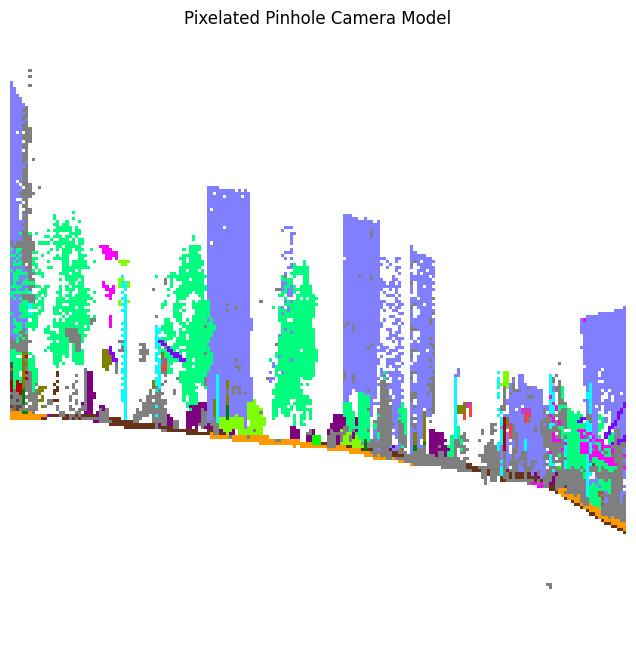

In [21]:
render_pixelated_pinhole_view(points, colors, camera_position, data_center,focal_length=0.9)

In [22]:
# Magic widget to move everywhere
def interactive_render(points, labels):
    # Define sliders
    focal_slider = widgets.FloatSlider(value=1, min=.5, max=5, step=.01, description='Focal')
    height_slider = widgets.FloatSlider(value=20, min=0, max=150, step=1, description='Height')
    angle_slider = widgets.FloatSlider(value=-3, min=-1.1-np.pi,  max=-1.1, step=.01, description='Angle')

    # Link sliders to the rendering function
    ui = widgets.VBox([focal_slider, height_slider, angle_slider])
    
    def update_view(focal_length, height, angle):
        height=np.array([0,0,height])
        temp_camera_position =  (data_center[0]+np.cos(angle)*200, data_center[1]+np.sin(angle)*200, 0)
        render_pixelated_pinhole_view(points, colors, temp_camera_position+height, data_center, focal_length)
    
    out = widgets.interactive_output(update_view, {'focal_length': focal_slider, 'height':height_slider, 'angle': angle_slider})
    
    display(ui, out)    
    
interactive_render(points, labels)

Output()

# Finally! Depth sensor modeling

In [7]:
def render_depth_sensor(points, camera_position, target_position, focal_length=1.0, grid_size=(200, 200)):
    # Create the camera rotation matrix
    up_vector = np.array([0, 0, 1])
    camera_rotation = compute_rotation_matrix(camera_position, target_position, up_vector)

    # Project the 3D points onto the 2D plane using pinhole model
    projected_points, dists = pinhole_projection(points, camera_position, camera_rotation, focal_length)

    # Create a blank color image for pixelated view
    pixelated_image = np.full(grid_size, fill_value=np.inf)

    min_x, max_x, min_y, max_y = -0.8, 0.3, -0.1, 0.2

    # Map projected points to pixel locations
    for point, dist in zip(projected_points, dists):
        # Transforming x,y coordinates to a pixel
        x_pixel = int((point[0] - min_x) * grid_size[1] / (max_x - min_x)) 
        y_pixel = int((point[1] - min_y) * grid_size[0] / (max_y - min_y))

        # Check boundaries
        if 0 <= x_pixel < grid_size[1] and 0 <= y_pixel < grid_size[0]:
            # Check if this point is closer
            if dist < pixelated_image[y_pixel, x_pixel]:
                pixelated_image[y_pixel, x_pixel] = dist

    # Mask the infinite values
    masked_image = np.ma.masked_invalid(pixelated_image)

    # Normalize only the finite (non-infinite) values
    min_distance = masked_image.min()
    max_distance = masked_image.max()
    normalized_image = (masked_image - min_distance) / (max_distance - min_distance)

    # Set up the colormap with white for masked values (inf)
    cmap = plt.cm.inferno
    cmap.set_bad(color='white')

    # Plot the normalized pixelated image
    plt.figure(figsize=(8, 8))
    plt.imshow(-normalized_image, cmap=cmap, interpolation='nearest', origin='lower')
    plt.axis('off') 
    plt.title('Depth Sensor Model')
    plt.show()

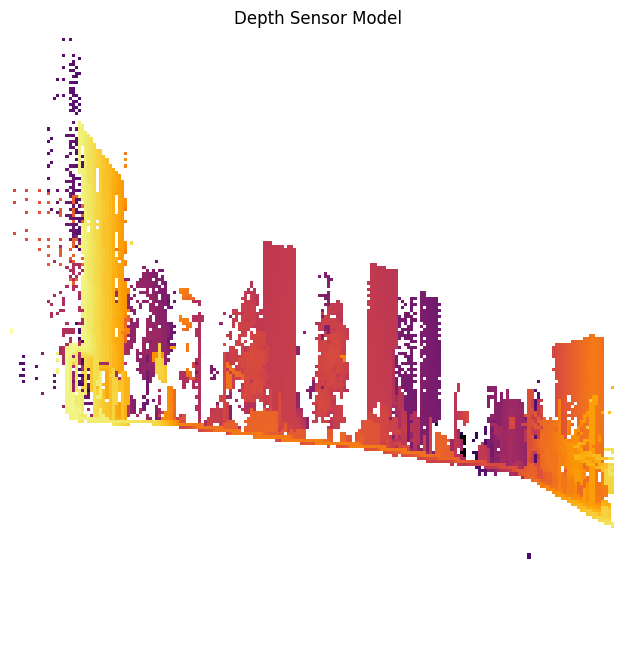

In [17]:
# Ligter colors are closer to us and darker colors are further
render_depth_sensor(points, camera_position, data_center, focal_length=.7)

In [18]:
# Magic widget to move everywhere
def interactive_render(points, labels):
    # Define sliders
    focal_slider = widgets.FloatSlider(value=1, min=.5, max=5, step=.01, description='Focal')
    height_slider = widgets.FloatSlider(value=20, min=0, max=150, step=1, description='Height')
    angle_slider = widgets.FloatSlider(value=-3, min=-1.1-np.pi,  max=-1.1, step=.01, description='Angle')

    # Link sliders to the rendering function
    ui = widgets.VBox([focal_slider, height_slider, angle_slider])
    
    def update_view(focal_length, height, angle):
        height=np.array([0,0,height])
        temp_camera_position =  (data_center[0]+np.cos(angle)*200, data_center[1]+np.sin(angle)*200, 0)
        render_depth_sensor(points, temp_camera_position+height, data_center, focal_length)
    
    out = widgets.interactive_output(update_view, {'focal_length': focal_slider, 'height':height_slider, 'angle': angle_slider})
    
    display(ui, out)    
    
interactive_render(points, labels)

Output()